In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Load the Titanic dataset

In [2]:
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")
print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Training data shape: (891, 12)
Test data shape: (418, 11)


In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

#### 2. Check for missing values

In [7]:
print("Missing values in training data:")
display(train_df.isnull().sum())
print("\nMissing values in test data:")
display(test_df.isnull().sum())

Missing values in training data:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Missing values in test data:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Exploratory Data Analysis (EDA):

#### 3. Explore data distributions using histograms and box plots


Data distributions in training data:


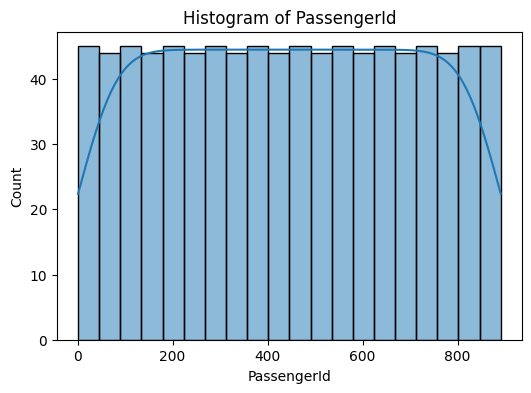

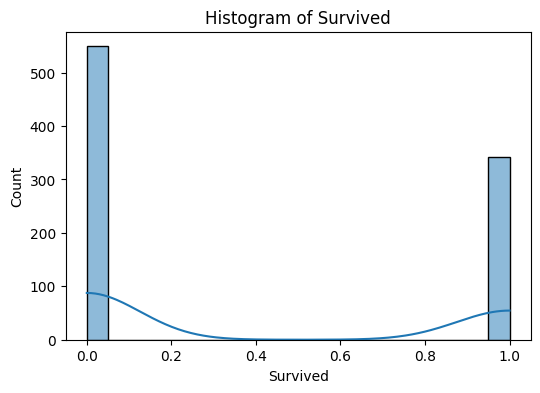

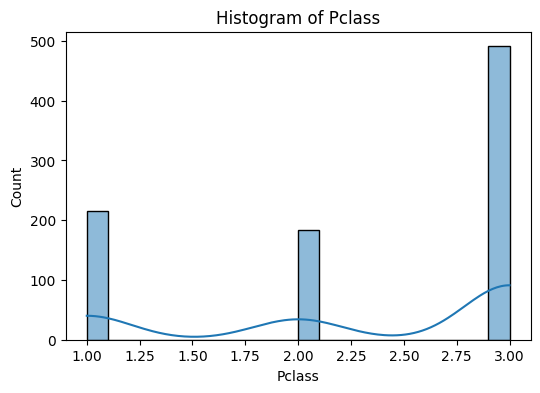

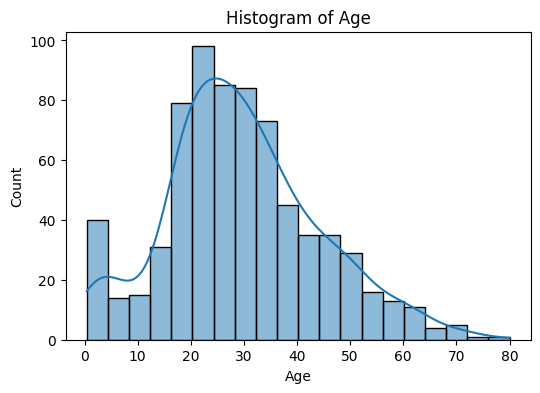

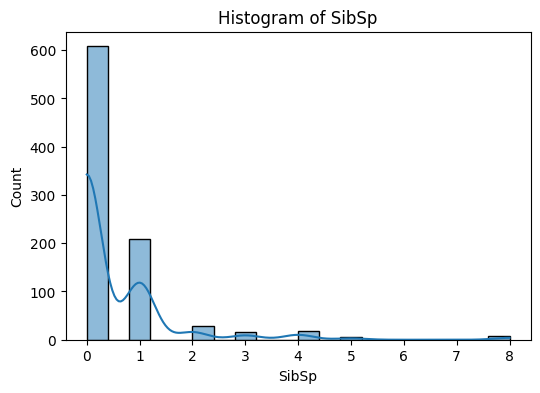

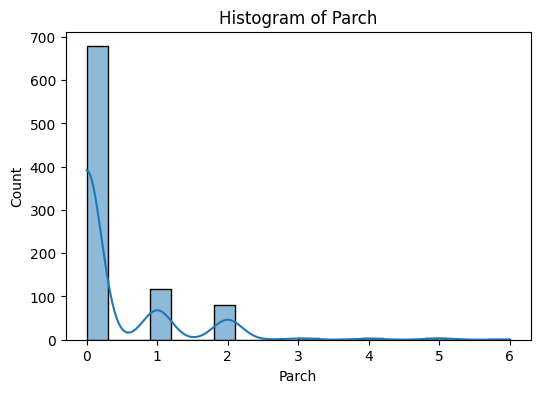

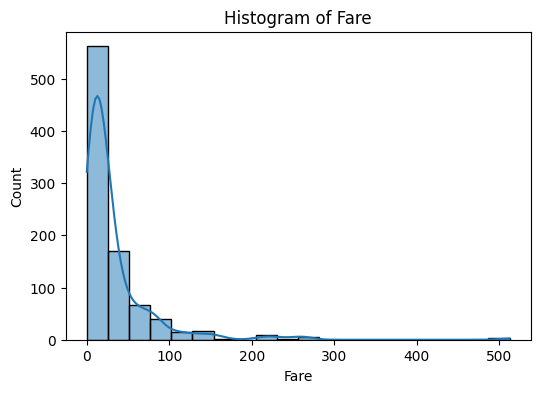

In [8]:
print("\nData distributions in training data:")
numeric_cols = train_df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(train_df[col], bins=20, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()


Box plots for numerical features in training data:


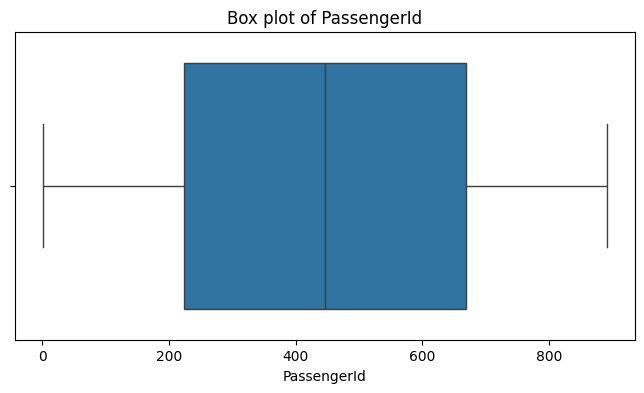

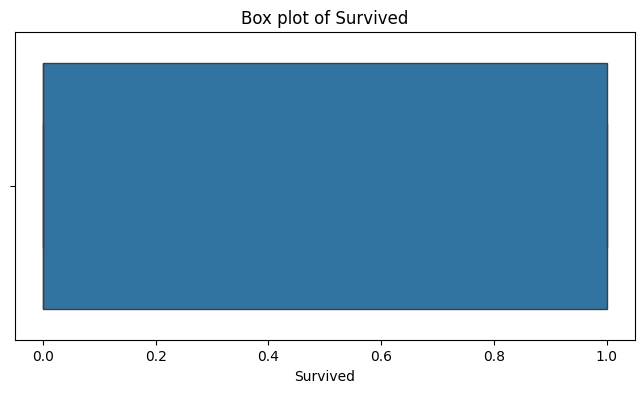

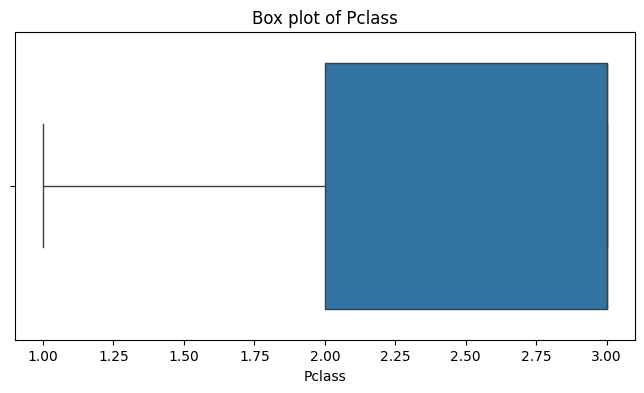

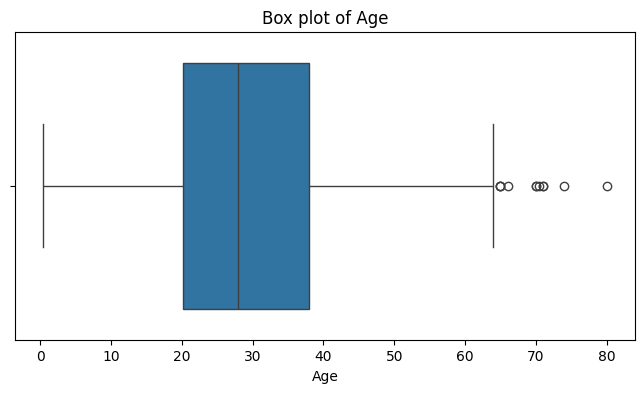

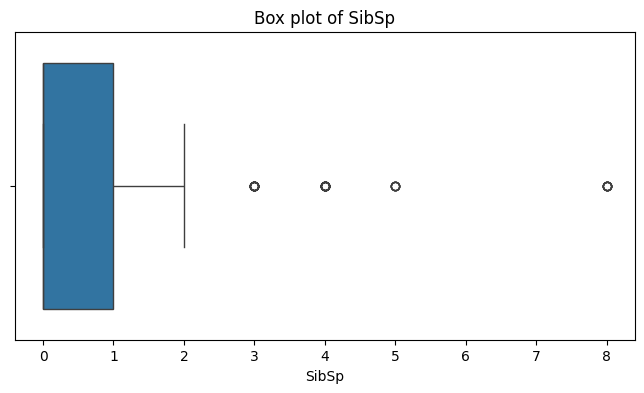

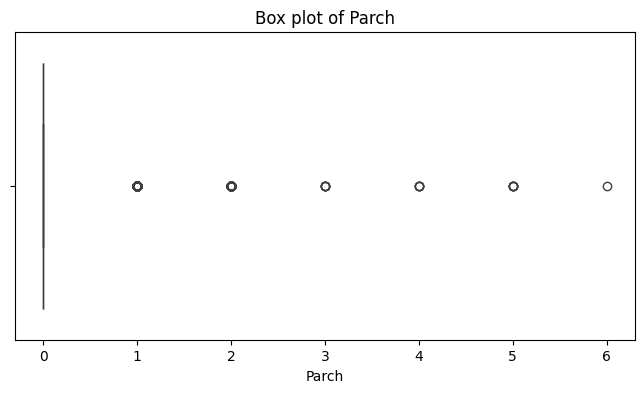

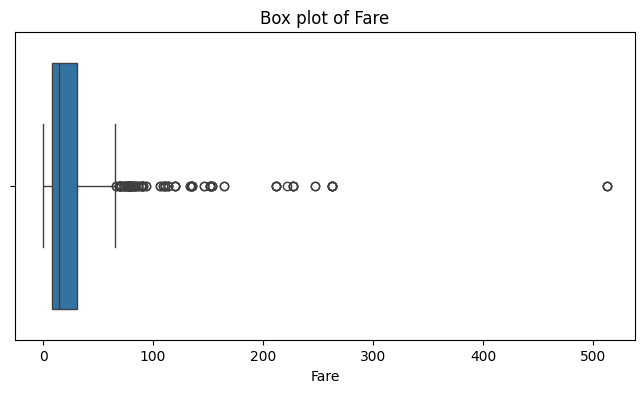

In [9]:
print("\nBox plots for numerical features in training data:")
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

#### 4. Visualize relationships between features and survival


Relationships between features and survival in training data:


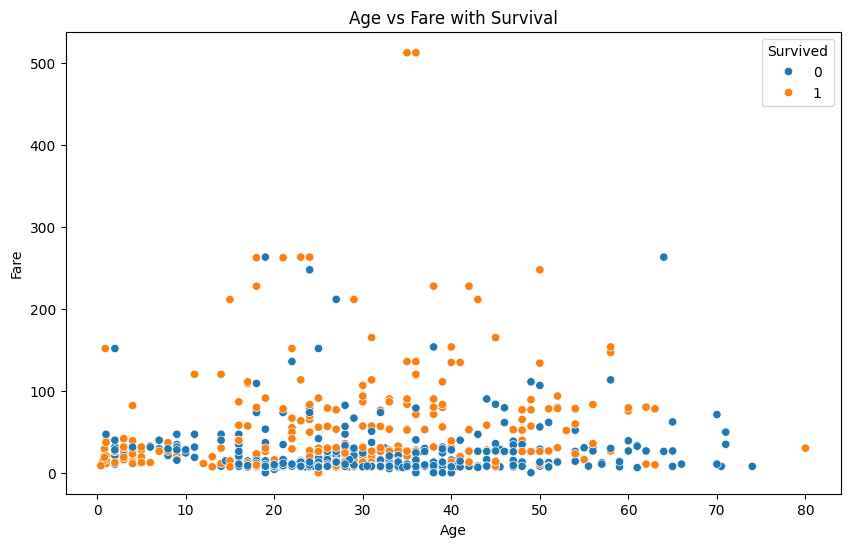

In [10]:
print("\nRelationships between features and survival in training data:")

# Scatter plot for Age vs Fare, colored by Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived')
plt.title('Age vs Fare with Survival')
plt.show()

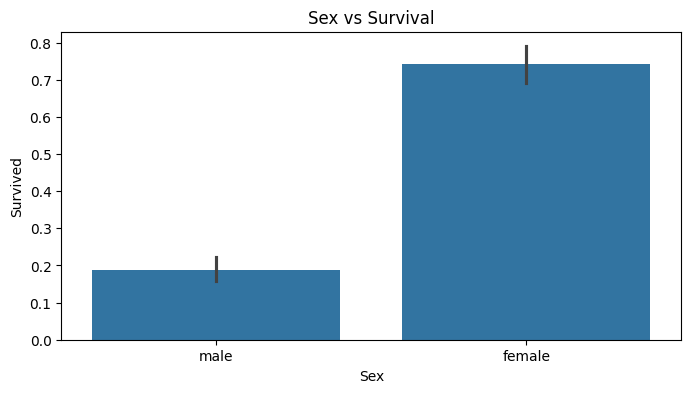

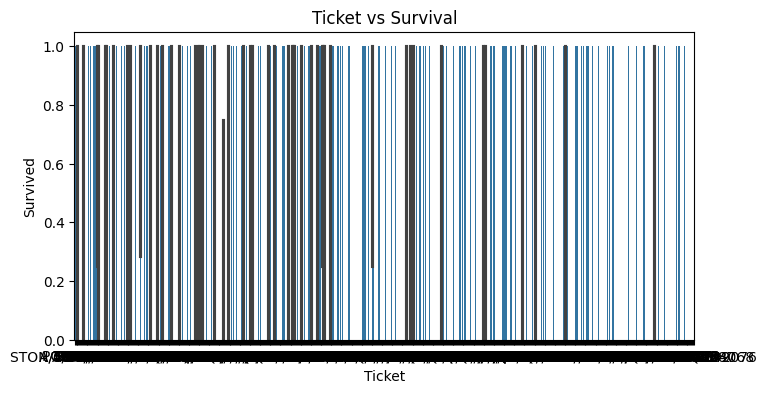

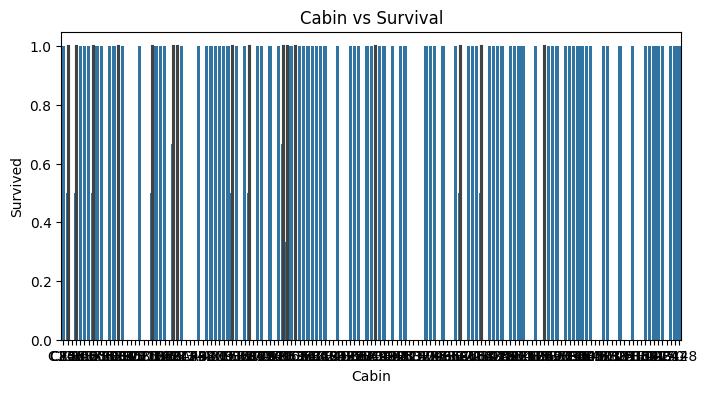

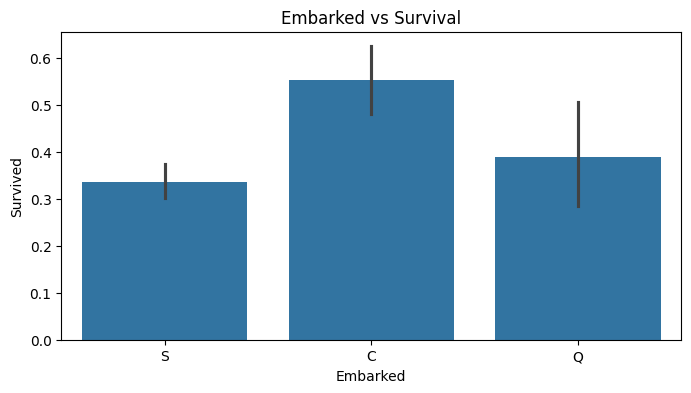

In [11]:
# Bar plots for categorical features vs Survival
categorical_cols = train_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Name': # Exclude 'Name' as it's not useful for this analysis
        plt.figure(figsize=(8, 4))
        sns.barplot(data=train_df, x=col, y='Survived')
        plt.title(f'{col} vs Survival')
        plt.show()

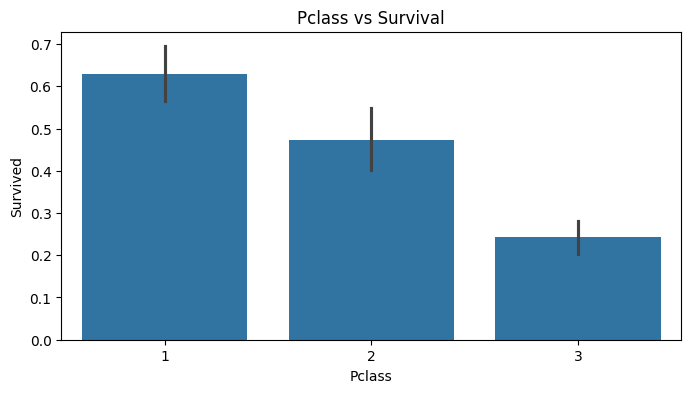

In [12]:
# Survival by Pclass
plt.figure(figsize=(8, 4))
sns.barplot(data=train_df, x='Pclass', y='Survived')
plt.title('Pclass vs Survival')
plt.show()

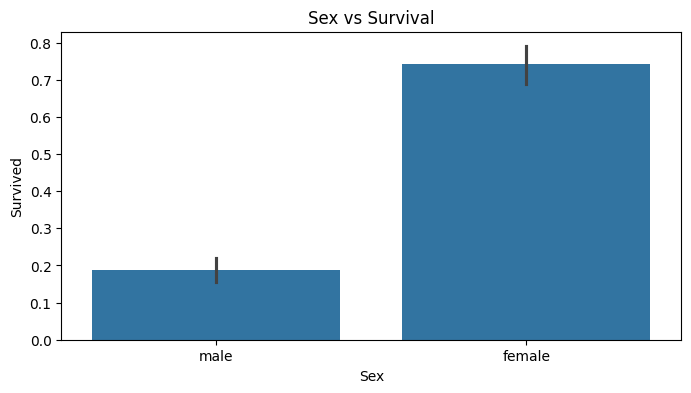

In [13]:
# Survival by Sex
plt.figure(figsize=(8, 4))
sns.barplot(data=train_df, x='Sex', y='Survived')
plt.title('Sex vs Survival')
plt.show()

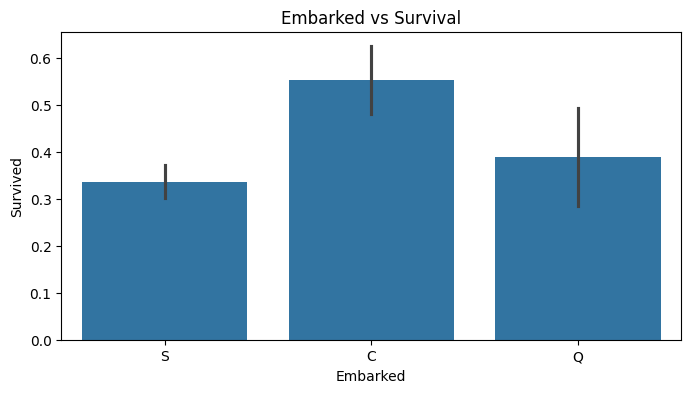

In [14]:
# Survival by Embarked
if 'Embarked' in train_df.columns:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=train_df, x='Embarked', y='Survived')
    plt.title('Embarked vs Survival')
    plt.show()

#### Data Preprocessing

#### 1.	Impute missing values.

In [15]:
# Fill missing values
#train_df
train_df['Age'].fillna(train_df['Age'].median())
#test_df
test_df['Age'].fillna(test_df['Age'].median())

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [16]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [17]:
train_df['Fare'].fillna(train_df['Fare'].median())
test_df['Fare'].fillna(test_df['Fare'].median())

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

#### 2.	Encode categorical variables using label encoding.

In [18]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train_df[col] = label_enc.fit_transform(train_df[col])
    test_df[col] = label_enc.transform(test_df[col])

### Building Predictive Models:

#### 1.	Split the preprocessed dataset into training and testing sets.

In [19]:
# Select features and target
from sklearn.model_selection import train_test_split
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

In [20]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

##### 2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
##### 3.	Build predictive models using LightGBM and XGBoost algorithms.
##### 4.Train the models on the training set and evaluate their performance on the testing set.

In [22]:
#%pip install lightgbm

In [23]:
#%pip install xgboost

### LightGBM Model

In [24]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42,verbose=-1)
lgb_model.fit(X_train, y_train)

lgb_preds = lgb_model.predict(X_val)

In [46]:
lgb_results = {
    'Accuracy': accuracy_score(y_val, lgb_preds),
    'Precision': precision_score(y_val, lgb_preds),
    'Recall': recall_score(y_val, lgb_preds),
    'F1-Score': f1_score(y_val, lgb_preds)
}

In [47]:
print("\nAccuracy:", accuracy_score(y_val, lgb_preds))
print("Precision:", precision_score(y_val, lgb_preds))
print("Recall:", recall_score(y_val, lgb_preds))
print("F1-Score:", f1_score(y_val, lgb_preds))


Accuracy: 0.7932960893854749
Precision: 0.7424242424242424
Recall: 0.7101449275362319
F1-Score: 0.725925925925926


In [48]:
print("LightGBM Performance:")
print(classification_report(y_val, lgb_preds))

LightGBM Performance:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.71      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### XGBoost Model

In [27]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_val)

In [51]:
xgb_results = {
      'Accuracy': accuracy_score(y_val, xgb_preds),
      'Precision': precision_score(y_val, xgb_preds),
      'Recall': recall_score(y_val, xgb_preds),
      'F1-Score': f1_score(y_val, xgb_preds)
}

In [50]:
print("Accuracy:", accuracy_score(y_val, xgb_preds))
print("Precision:", precision_score(y_val, xgb_preds))
print("Recall:", recall_score(y_val, xgb_preds))
print("F1-Score:", f1_score(y_val, xgb_preds))

Accuracy: 0.8156424581005587
Precision: 0.78125
Recall: 0.7246376811594203
F1-Score: 0.7518796992481203


In [43]:
print("XGBoost Performance:")
print(classification_report(y_val, xgb_preds))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



##### 5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [31]:
from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid_lgb = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]}

lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), param_grid_lgb, cv=5, scoring='accuracy', n_jobs=-1)
lgb_grid.fit(X, y)

,estimator,LGBMClassifie...ndom_state=42)
,param_grid,"{'learning_rate': [0.1, 0.01], 'n_estimators': [100, 200], 'num_leaves': [31, 50]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [32]:
print("Best LightGBM Params:", lgb_grid.best_params_)
print("Best LightGBM CV Score:", lgb_grid.best_score_)

Best LightGBM Params: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 50}
Best LightGBM CV Score: 0.8350386039796623


In [34]:
param_grid_xgb = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

xgb_grid = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X, y)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.1, 0.01], 'max_depth': [3, 5], 'n_estimators': [100, 200]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [35]:
print("Best XGBoost Params:", xgb_grid.best_params_)
print("Best XGBoost CV Score:", xgb_grid.best_score_)

Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best XGBoost CV Score: 0.831680371602536


#### Comparative Analysis:

##### 1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

In [52]:
# Comparative Analysis
results_df = pd.DataFrame([lgb_results, xgb_results], index=['LightGBM', 'XGBoost'])
print("\nComparative Results:\n", results_df)


Comparative Results:
           Accuracy  Precision    Recall  F1-Score
LightGBM  0.793296   0.742424  0.710145  0.725926
XGBoost   0.815642   0.781250  0.724638  0.751880


##### 2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

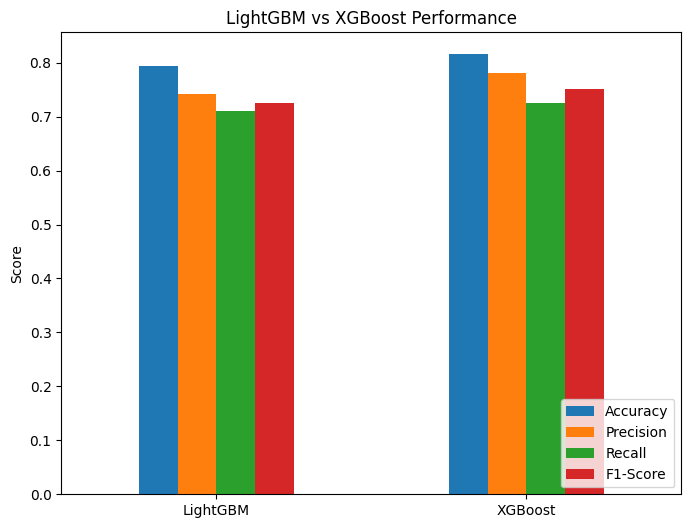

In [53]:
# Visualization
results_df.plot(kind='bar', figsize=(8,6))
plt.title("LightGBM vs XGBoost Performance")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Interpretation of results
Interpretation:
Based on the classification reports and the bar plot:
1.XGBoost has slightly higher Accuracy and F1-Score compared to LightGBM on the validation set.
2.XGBoost also has a better Recall score, indicating it is slightly better at identifying actual survivors.
3.The Precision scores are similar, meaning both models are comparable in terms of avoiding false positives.
Overall, XGBoost appears to perform slightly better than LightGBM on this validation set based on these metrics.

Strengths & Weaknesses

LightGBM Strengths:
Generally faster to train (efficient with large datasets).
Good precision - fewer false alarms.
Simpler hyperparameter tuning compared to XGBoost.

LightGBM Weaknesses:
Sometimes sacrifices recall (may miss some survivors).
Can underperform on highly imbalanced data without tuning.

XGBoost Strengths:
Typically stronger recall - better at identifying survivors.
More robust on imbalanced data with proper tuning.
Often achieves slightly higher overall performance with careful hyperparameter optimization.

XGBoost Weaknesses:
Slower to train than LightGBM.
More sensitive to hyperparameter settings (easy to overfit if not tuned well).